# ライブラリ

In [1]:
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
%cd ..
from MIC import *
from MIC.utils import *
from MIC.visualize import *
from MIC.calc import *
from MIC.dataloader import *
from MIC.statistics import *
%cd sample

/Users/junnai_ai/Desktop/統計実験コード/最小情報コピュラ
/Users/junnai_ai/Desktop/統計実験コード/最小情報コピュラ/sample


In [56]:
epsilon = 1e-7

# お試し

In [4]:
def greedy_mic_plus(size,const,inv,k):
    '''
    inv: (pseudo) log odds ratio
    '''
    def solve_movement_MICK(theta,x1,x2,x3,x4,k):
        a = 1-math.exp(theta*(x1+x2+x3+x4))
        b = x1+x4+(x2+x3)*math.exp(theta*((x1+x2+x3+x4)**k))
        c = x1*x4 - x2*x3*math.exp(theta*((x1+x2+x3+x4)**k))
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def solve_movement_MICS(theta,x1,x2,x3,x4):
        a = 1-math.exp(theta)
        b = x1+x4+(x2+x3)*math.exp(theta)
        c = x1*x4 - x2*x3*math.exp(theta)
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def greedy_MICK_plus(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICK(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1],k)
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    def greedy_MICS_plus(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICS(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1])
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    if const=="rho":
        return greedy_MICS_plus(size,inv)
    else:
        return greedy_MICK_plus(size,inv)

In [5]:
def greedy_mic(size,const,inv):
    '''
    inv: (pseudo) log odds ratio
    '''
    def solve_movement_MICK(theta,x1,x2,x3,x4):
        a = 1-math.exp(theta*(x1+x2+x3+x4))
        b = x1+x4+(x2+x3)*math.exp(theta*(x1+x2+x3+x4))
        c = x1*x4 - x2*x3*math.exp(theta*(x1+x2+x3+x4))
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def solve_movement_MICS(theta,x1,x2,x3,x4):
        a = 1-math.exp(theta)
        b = x1+x4+(x2+x3)*math.exp(theta)
        c = x1*x4 - x2*x3*math.exp(theta)
        solution = solv_quadratic_equation(a,b,c)
        return solution

    def greedy_MICK(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICK(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1])
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    def greedy_MICS(size,invariance):
        n = size #n=30で45s.
        opt = create_uniform((n,n))

        while True: 
            max_delta = 0
            for i in range(n-1):
                for j in range(n-1):
                    delta = solve_movement_MICS(invariance,opt[i][j],opt[i+1][j],opt[i][j+1],opt[i+1][j+1])
                    opt[i][j] += delta
                    opt[i+1][j+1] += delta
                    opt[i+1][j] -= delta
                    opt[i][j+1] -= delta
                    if delta > max_delta:
                        max_delta = delta
            if abs(max_delta) < epsilon:
                break
        return opt
    
    if const=="rho":
        return greedy_MICS(size,inv)
    else:
        return greedy_MICK(size,inv)

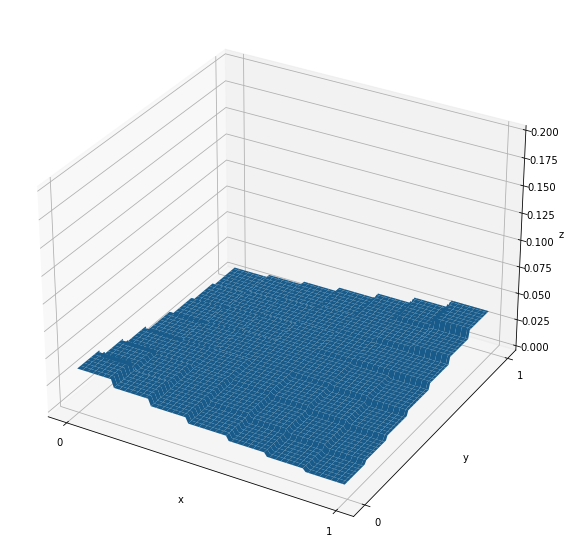

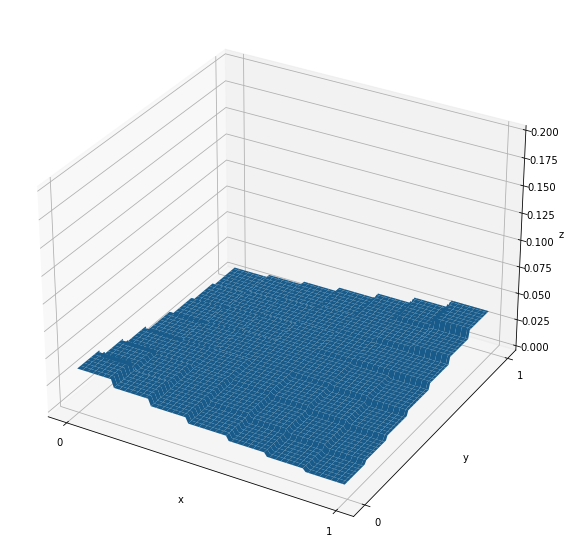

In [6]:
mat = greedy_mic_plus(7,"tau",1,k = 1)
three_dim_plot_flatten(mat)

# MICKとMICSの尤度を比較する

## データロード

In [7]:
from datetime import datetime, date, timedelta
start = date(2013,1,1)
end = date(2019,12,31) #7年分

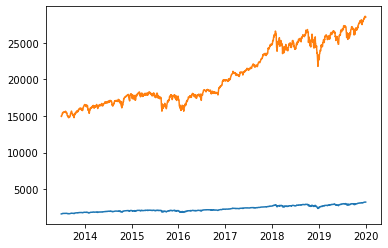

In [8]:
df_sp = get_data_from_fred(start,end,"SP500").dropna()
df_nikkei = get_data_from_fred(start,end,"NIKKEI225").dropna()
df_dau = get_data_from_fred(start,end,"DJIA").dropna()
plt.plot(df_sp)
plt.plot(df_dau)

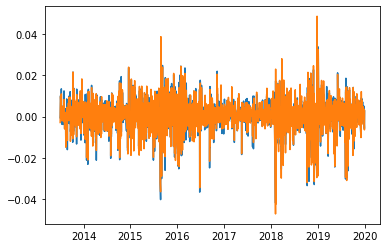

In [9]:
df_sp_adj = log_return(df_sp,0)
df_nikkei_adj = log_return(df_nikkei,0)
df_dau_adj = log_return(df_dau,0)
plt.plot(df_sp_adj)
plt.plot(df_dau_adj)

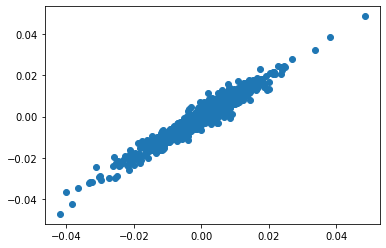

In [10]:
plt.scatter(df_sp_adj,df_dau_adj)

In [11]:
df_merged = pd.DataFrame()
df_merged["sp"] = df_sp_adj
df_merged["dau"] = df_dau_adj
calc_bivar_stats(df_merged)

u=0.05,Threshold: -0.013995038527950136,-0.014198120589032467
λL: 0.8395061728395061
u=0.01,Threshold: -0.02528236287170431,-0.0241596345956294
λL: 0.8125
u=0.05,Threshold: 0.012801813443832692,0.013004044273840701
λU: 0.7777777777777778
u=0.01,Threshold: 0.0203179415517183,0.020545219319966432
λU: 0.9375


(KendalltauResult(correlation=0.8016642949878665, pvalue=0.0),
 SpearmanrResult(correlation=0.9390767888922271, pvalue=0.0),
 0.8395061728395061,
 0.8125,
 0.7777777777777778,
 0.9375)

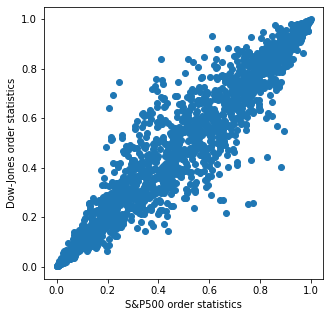

In [12]:
df_os, df_preprocessed = preprocessing(df_merged)
#散布図
plt.figure(figsize=(5,5))
plt.xlabel("S&P500 order statistics")
plt.ylabel("Dow-Jones order statistics")
plt.scatter(df_preprocessed["sp-os"],df_preprocessed["dau-os"])

# フィッティング（n=30だと数分かかる）

In [36]:
n = 30
mick = greedy_mic_plus(n,"tau",inv=9.5,k=1)
mics = greedy_mic_plus(n,"rho",inv=0.1,k=0) #kは使わない
#mics2 = greedy_mic_plus(n,"tau",inv=0.1,k=0) #なぜエラー？

## 尤度比較

In [55]:
for alpha in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    #alpha = 0.5
    mic_ks = alpha*mick+(1-alpha)*mics

    log_likelihood = 0
    for data in list(df_os.values):
        i_ = int(data[0]/(1/n))
        j_ = int(data[1]/(1/n))
        l = mic_ks[i_][j_]/((1/n)*(1/n))
        log_likelihood += math.log(l)
    print(f"MICK+MICSの対数尤度(alpha={alpha}):",log_likelihood)

MICK+MICSの対数尤度(alpha=0): 1585.6017109503646
MICK+MICSの対数尤度(alpha=0.1): 1606.0281950478543
MICK+MICSの対数尤度(alpha=0.2): 1620.6829045283753
MICK+MICSの対数尤度(alpha=0.3): 1633.3646787969724
MICK+MICSの対数尤度(alpha=0.4): 1644.7128794282885
MICK+MICSの対数尤度(alpha=0.5): 1654.9766553763438
MICK+MICSの対数尤度(alpha=0.6): 1664.2795688749732
MICK+MICSの対数尤度(alpha=0.7): 1672.689712102518
MICK+MICSの対数尤度(alpha=0.8): 1680.245368694661
MICK+MICSの対数尤度(alpha=0.9): 1686.9662032794647
MICK+MICSの対数尤度(alpha=1): 1692.8586358473847


In [59]:
mick_square = greedy_mic_plus(n,"tau",inv=9.5,k=1.2)

log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mick_square[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1267.4957676754584


In [61]:
mick_square = greedy_mic_plus(n,"tau",inv=9.5,k=0.9)

log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mick_square[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1455.4225272477302


In [64]:
mic = greedy_mic_plus(n,"tau",inv=9,k=1)
log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mic[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1699.0979487950508


In [65]:
mic = greedy_mic_plus(n,"tau",inv=10,k=1)
log_likelihood = 0
for data in list(df_os.values):
    i_ = int(data[0]/(1/n))
    j_ = int(data[1]/(1/n))
    l = mic[i_][j_]/((1/n)*(1/n))
    log_likelihood += math.log(l)
print(f"MICの対数尤度:",log_likelihood)

MICの対数尤度: 1681.6710754669696


# Frank copulaの図示

In [4]:
def generator_frank(t,theta=1):
    return -np.log(1-(1-np.exp(-theta))*np.exp(-t))/theta

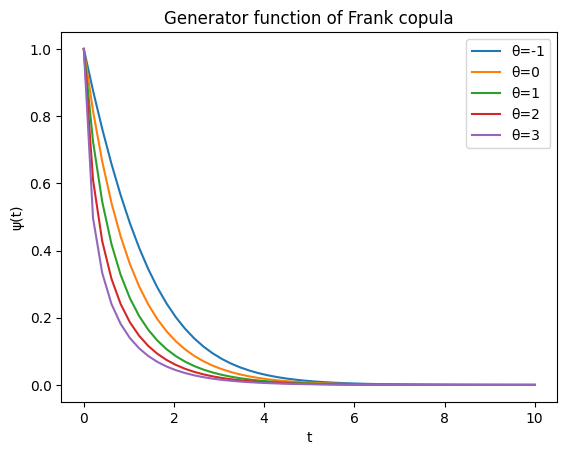

In [8]:
t = np.linspace(0,10)
psi = generator_frank(t,theta=-1)
plt.plot(t,psi,label="θ=-1")
psi = generator_frank(t,theta=1e-5)
plt.plot(t,psi,label="θ=0")
psi = generator_frank(t,theta=1)
plt.plot(t,psi,label="θ=1")
psi = generator_frank(t,theta=2)
plt.plot(t,psi,label="θ=2")
psi = generator_frank(t,theta=3)
plt.plot(t,psi,label="θ=3")
plt.xlabel("t")
plt.ylabel("ψ(t)")
plt.title("Generator function of Frank copula")
plt.legend()

# local dependenceをgreedyに指定してみる

In [66]:
def fix_log_odds_movement(x1,x2,x3,x4,k): #2x2 submatrix [[x1,x2],[x3,x4]]
    '''
    移動後のlog odds ratioをkに調整. 
    '''
    a = 1-math.exp(k)
    b = x1+x4+(x2+x3)*math.exp(k)
    c = x1*x4 - x2*x3*math.exp(k)
    solution = solv_quadratic_equation(a,b,c) #ax^2+bx+c=0を数値的に解く
    return solution

def fix_relative_interaction_movement(x1,x2,x3,x4,k): #2x2 submatrix [[x1,x2],[x3,x4]]
    '''
    移動後のlog odds ratioをkに調整. 
    '''
    p = x1+x2+x3+x4
    a = 1-math.exp(k*p)
    b = x1+x4+(x2+x3)*math.exp(k*p)
    c = x1*x4 - x2*x3*math.exp(k*p)
    solution = solv_quadratic_equation(a,b,c) #ax^2+bx+c=0を数値的に解く
    return solution

def ldf(x,y):
    return 1

def local_greedy(n, mode="lr"):
    opt = create_uniform((n,n))
    while True: 
        max_delta = 0
        for i in range(n-1):
            for j in range(n-1):
                target = ldf((i+1)/n,(j+1)/n) #(その境界点でのLDFの値)
                if mode == "lr":
                    delta = fix_log_odds_movement(opt[i][j],opt[i][j+1],opt[i+1][j],opt[i+1][j+1],target)
                elif mode == "ri":
                   delta = fix_relative_interaction_movement(opt[i][j],opt[i][j+1],opt[i+1][j],opt[i+1][j+1],target)
                else:
                    delta = 0
                opt[i][j] += delta
                opt[i+1][j+1] += delta
                opt[i+1][j] -= delta
                opt[i][j+1] -= delta
                if delta > max_delta:
                    max_delta = delta
        if abs(max_delta) < epsilon:
            break
    three_dim_plot_flatten(opt)
    print(np.sum(opt,axis=0),np.sum(opt,axis=1))
    return opt

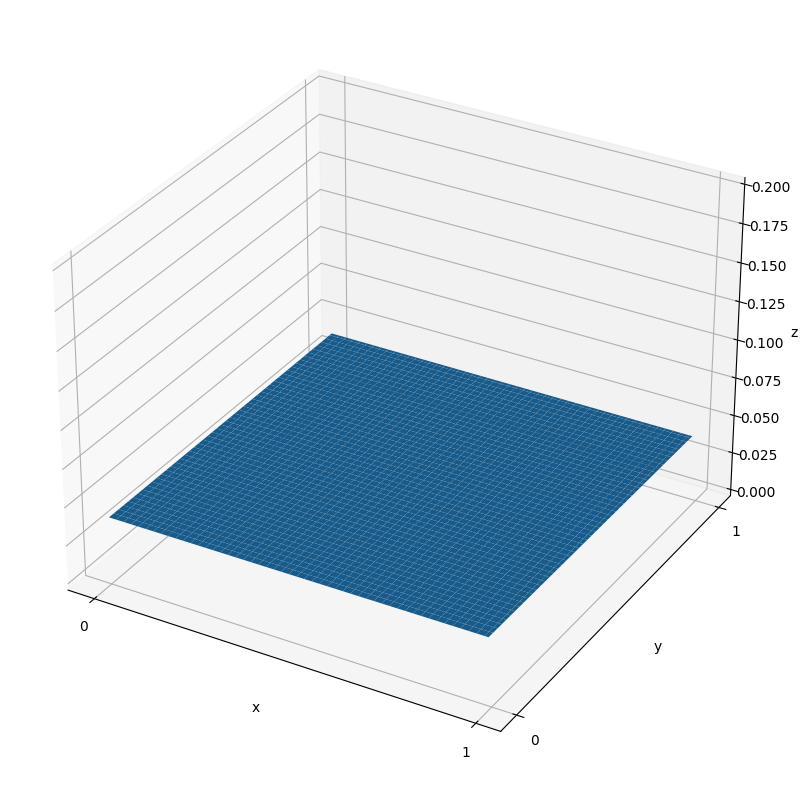

In [38]:
#LDFが定数の場合はMICSに一致.
def ldf(x,y):return 1e-5
local_greedy(5)

[0.2 0.2 0.2 0.2 0.2] [0.2 0.2 0.2 0.2 0.2]


array([[1.25620535e-01, 6.76701197e-02, 6.65852406e-03, 5.07944854e-05,
        2.64710705e-08],
       [5.41022919e-02, 7.92219980e-02, 5.75991226e-02, 8.82547356e-03,
        2.51113993e-04],
       [1.64597051e-02, 3.97373316e-02, 7.85350194e-02, 5.39296121e-02,
        1.13383319e-02],
       [3.28629487e-03, 1.10725475e-02, 4.26228035e-02, 7.95610450e-02,
        6.34573092e-02],
       [5.31172857e-04, 2.29800330e-03, 1.45845305e-02, 5.76330749e-02,
        1.24953218e-01]])

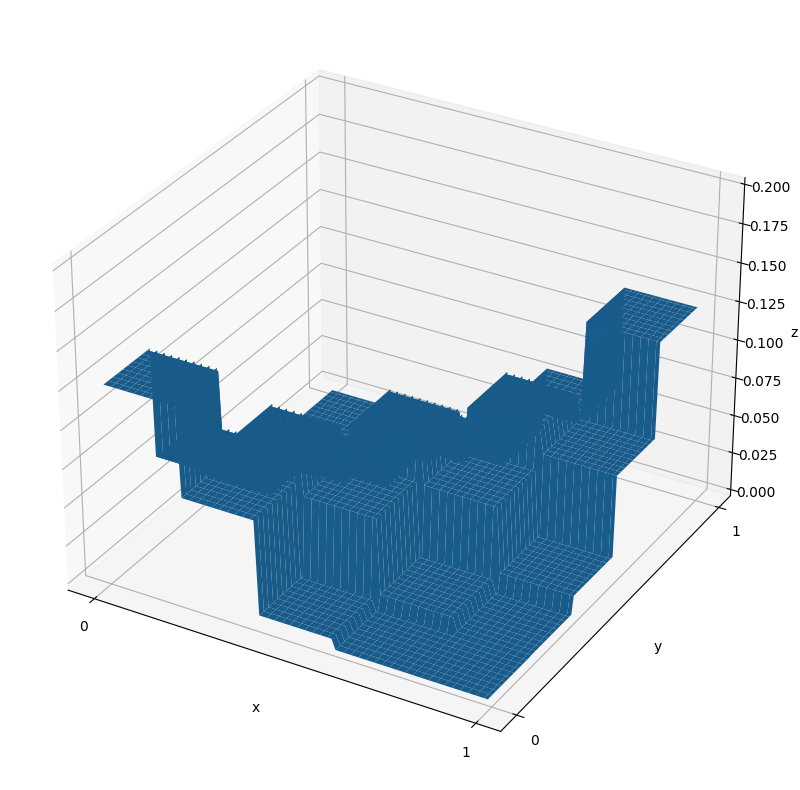

In [64]:
#LDFを非対称にしてみる.
def ldf(x,y):return y/x
local_greedy(5)

[0.2 0.2 0.2 0.2 0.2] [0.2 0.2 0.2 0.2 0.2]


array([[1.25620577e-01, 5.41023063e-02, 1.64596717e-02, 3.28627489e-03,
        5.31169938e-04],
       [6.76700872e-02, 7.92220210e-02, 3.97373448e-02, 1.10725436e-02,
        2.29800336e-03],
       [6.65851482e-03, 5.75990963e-02, 7.85350406e-02, 4.26228141e-02,
        1.45845342e-02],
       [5.07943266e-05, 8.82546278e-03, 5.39296116e-02, 7.95610544e-02,
        5.76330769e-02],
       [2.64709356e-08, 2.51113593e-04, 1.13383313e-02, 6.34573130e-02,
        1.24953216e-01]])

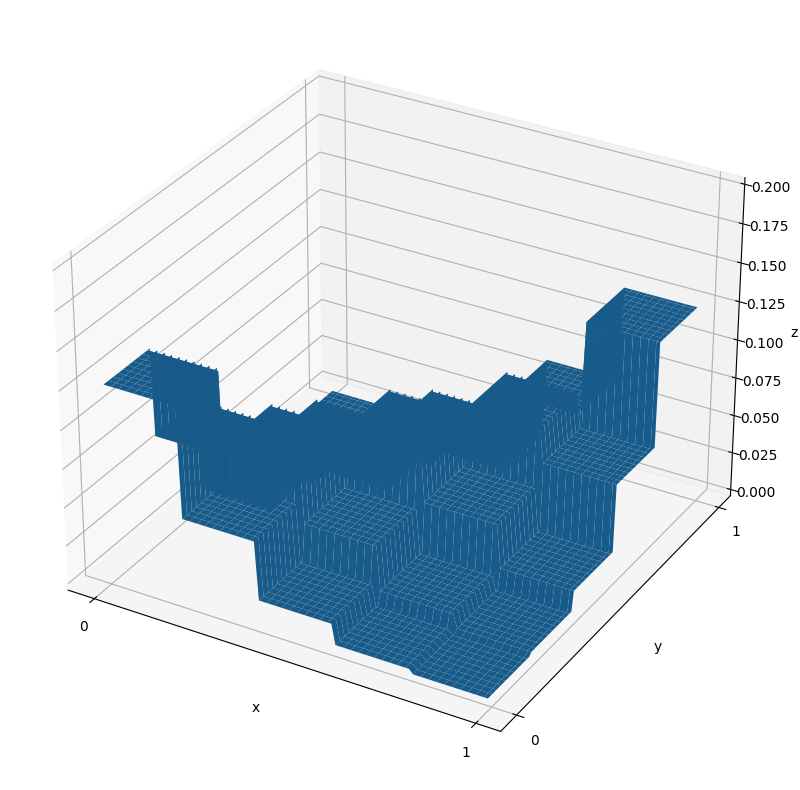

In [65]:
#LDFを非対称にしてみる.
def ldf(x,y):return x/y
local_greedy(5)

### LRとRIの違い

[0.2 0.2 0.2 0.2 0.2] [0.2 0.2 0.2 0.2 0.2]


array([[0.04409012, 0.04304688, 0.04097765, 0.03792356, 0.03396179],
       [0.04304674, 0.04231902, 0.040827  , 0.03850839, 0.03529885],
       [0.04097754, 0.04082693, 0.04043718, 0.03962799, 0.03813036],
       [0.03792361, 0.03850832, 0.03962791, 0.04114987, 0.04279029],
       [0.03396199, 0.03529885, 0.03813025, 0.04279019, 0.04981871]])

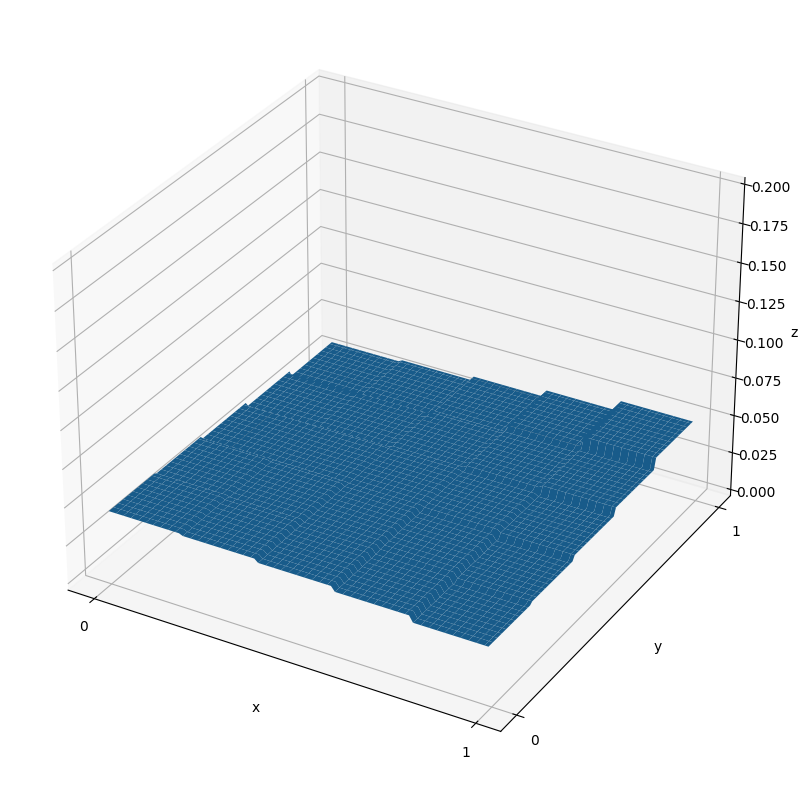

In [72]:
def ldf(x,y):return x*y
local_greedy(5, mode="ri")

[0.2 0.2 0.2 0.2 0.2] [0.2 0.2 0.2 0.2 0.2]


array([[0.06186892, 0.05611553, 0.04426692, 0.02716939, 0.01057925],
       [0.05611543, 0.05297404, 0.04526908, 0.03132685, 0.01431459],
       [0.04426688, 0.04526902, 0.04539679, 0.0399365 , 0.0251308 ],
       [0.02716945, 0.03132681, 0.03993644, 0.05035699, 0.05121031],
       [0.01057933, 0.01431459, 0.02513076, 0.05121027, 0.09876505]])

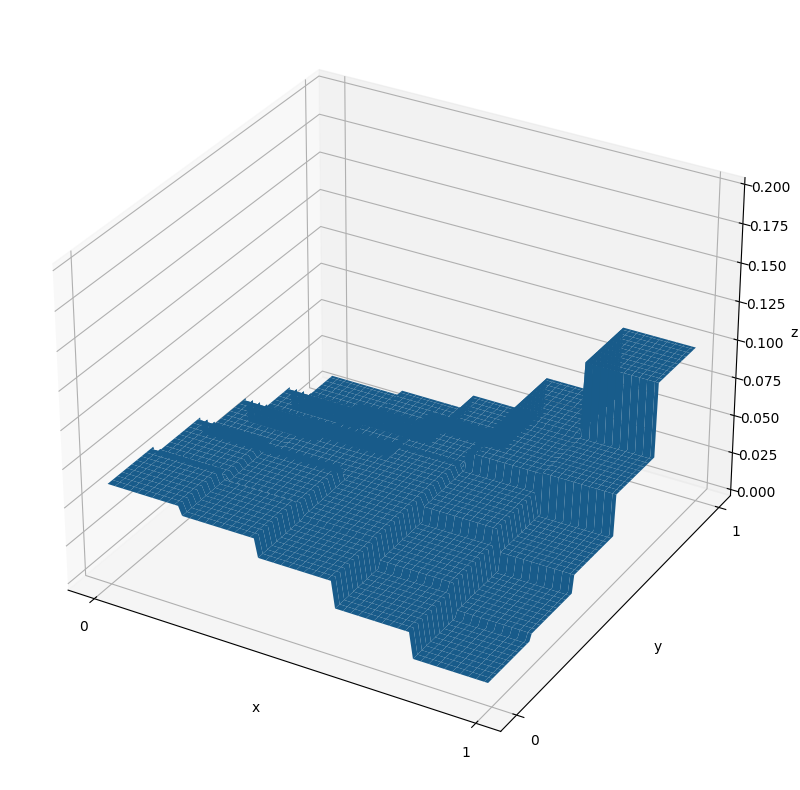

In [70]:
def ldf(x,y):return x*y
local_greedy(5, mode="lr")

[0.2 0.2 0.2 0.2 0.2] [0.2 0.2 0.2 0.2 0.2]


array([[0.1397044 , 0.04978039, 0.00905458, 0.00128855, 0.00017207],
       [0.04978037, 0.09377738, 0.04605932, 0.00909439, 0.00128854],
       [0.00905459, 0.0460593 , 0.08977226, 0.0460593 , 0.00905455],
       [0.00128856, 0.00909439, 0.04605929, 0.09377742, 0.04978035],
       [0.00017207, 0.00128854, 0.00905455, 0.04978034, 0.13970449]])

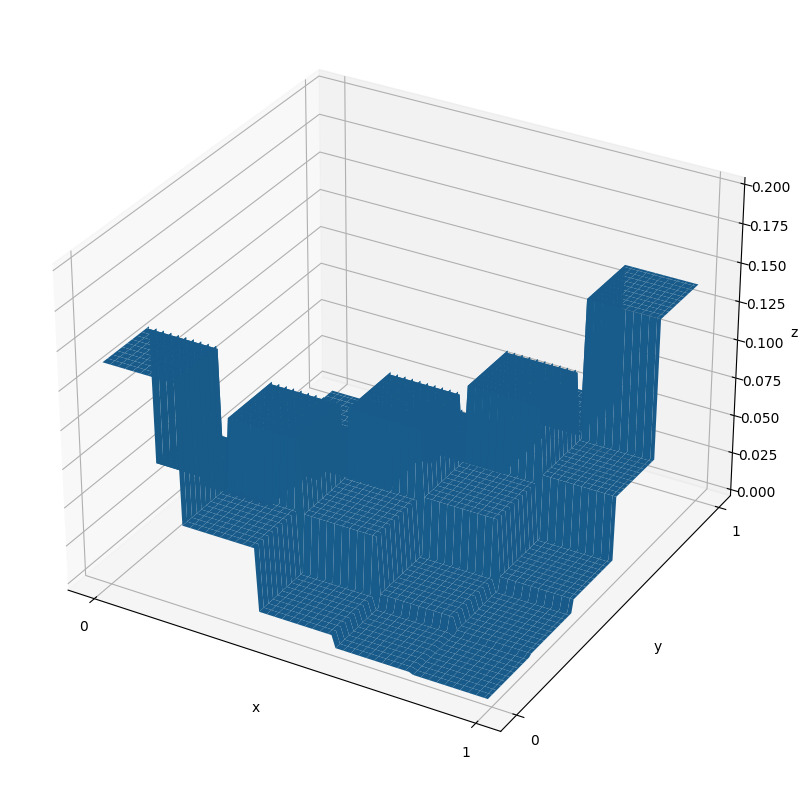

In [75]:
#RIが一定なのはMICK
def ldf(x,y):return 5
local_greedy(5, mode="ri")

[0.2 0.2 0.2 0.2 0.2] [0.2 0.2 0.2 0.2 0.2]


array([[1.85365523e-01, 1.46263746e-02, 8.10226938e-06, 3.01472054e-11,
        7.87624860e-19],
       [1.46263746e-02, 1.71284015e-01, 1.40818343e-02, 7.77628224e-06,
        3.01472048e-11],
       [8.10226938e-06, 1.40818343e-02, 1.71820127e-01, 1.40818343e-02,
        8.10226940e-06],
       [3.01472050e-11, 7.77628224e-06, 1.40818343e-02, 1.71284015e-01,
        1.46263746e-02],
       [7.87837661e-19, 3.01472053e-11, 8.10226940e-06, 1.46263746e-02,
        1.85365523e-01]])

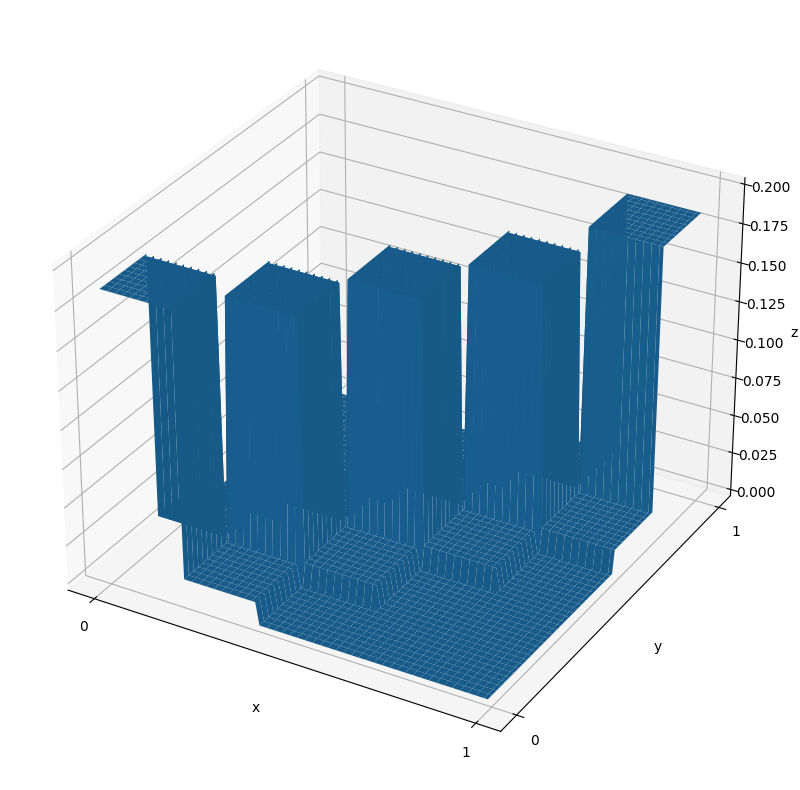

In [77]:
#LRが一定なのはMICS
def ldf(x,y):return 5
local_greedy(5, mode="lr")

### 下側従属性をフィッティングしてみる

### Interactionの場合

In [268]:
def clayton_density(u,v,theta):
    return (theta+1)*((u*v)**(-theta-1))*((u**(-theta)+v**(-theta)-1)**(-2+1/theta))    
def clayton_cdf(u,v,theta):
    return (u**(-theta)+v**(-theta)-1)**(-1/theta)

In [199]:
def sample_from_clayton(deg,alpha): #generatorはu^(-α)-1
    #MO法
    #ガンマ分布G(1/α)からサンプル. https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html
    #alphaはClaytonのパラメタ
    theta_0 = np.random.gamma(shape=1/alpha, scale=1.0, size=1)
    #一様乱数
    I = np.random.uniform(0, 1, deg)
    #
    U = (1-(np.log(I)/theta_0))**(-1/alpha)
    return U

    #一様乱数
    # u = np.random.uniform(0, 1, 1)
    # w = np.random.uniform(0, 1, 1)
    # v = ((w**(-alpha/(alpha+1))-1)*(u**-alpha)-1)**(-1/alpha)
    # return np.array([u,v]).T


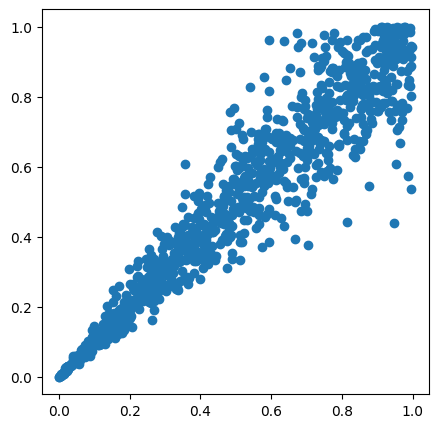

In [316]:
alpha = 10
n_samples = 1000
samples = np.array([sample_from_clayton(2,alpha) for _ in range(n_samples)]) #shapeは(n_samples,deg)
plt.figure(figsize=(5,5))
plt.scatter(samples[:,0],samples[:,1])

## Jones and Koch (2003)

In [345]:
def ldf_estimator(x0,y0,samples):
    '''
    samples : size[n,2]
    '''
    n = len(samples)
    sigma1 = np.std(samples[:,0])
    sigma2 = np.std(samples[:,1])
    rho = np.corrcoef(samples.T)[1][0]
    print(sigma1,sigma2,rho)


    #Gausiann kernelの場合
    # s2 = 1 #標準正規分布の2次モーメント
    h1 = 0.5
    h2 = 0.5
    #h1 = (sigma1*((1/s2)**(1/3))*((1-rho**2)**(5/12)))/((n*(1+rho**2/2))**(1/6)) 
    #h2 = (sigma2*((1/s2)**(1/3))*((1-rho**2)**(5/12)))/((n*(1+rho**2/2))**(1/6)) #ガウス積分がちょうど定数倍を打ち消す
    #Tricube Kernelの場合. rule of thumb.
    s2 = (71/80)*(1/12)
    square = 1
    #h1 = (sigma1*((2*math.exp(math.pi)*square/s2)**(1/3))*((1-rho**2)**(5/12)))/((n*(1+rho**2/2))**(1/6)) 
    #h2 = (sigma2*((2*math.exp(math.pi)*square/s2)**(1/3))*((1-rho**2)**(5/12)))/((n*(1+rho**2/2))**(1/6)) 
    print(h1,h2)


    def tricube_kernel(u):
        return (70/81)*((1-abs(u)**3)**3)
    
    def gaussian_kernel(u):
        return np.exp(-u**2/2)/np.sqrt(2*np.pi)
                         
    def func_g(i,j,x,y):
        '''
        i,j in [0,1]
        '''
        res = []
        for k in range(len(samples)):
            Xk, Yk = samples[k][0],samples[k][1]
            res.append((Xk**i)*(Yk**j)*tricube_kernel((Xk-x)/h1)*tricube_kernel((Yk-y)/h2))
            #res.append((Xk**i)*(Yk**j)*gaussian_kernel((Xk-x)/h1)*gaussian_kernel((Yk-y)/h2))
        return sum(res)/(n*h1*h2)
      
    gamma = func_g(1,1,x0,y0) - func_g(0,1,x0,y0)*func_g(1,0,x0,y0)/func_g(0,0,x0,y0)
    gamma /= func_g(0,0,x0,y0)
    gamma /= (h1**2)*(h2**2)*(s2**2)
    return gamma

0.2947998649252889 0.28998602924647804 0.9540471977324579
0.5 0.5


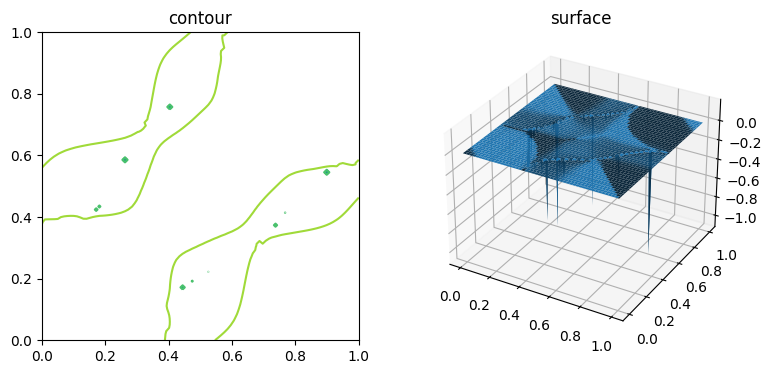

In [346]:
def draw():
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)

    X, Y = np.meshgrid(x, y)
    Z = ldf_estimator(X,Y,samples)

    fig = plt.figure(figsize=(9, 4))

    # 等高線を作成する。
    ax1 = fig.add_subplot(121)
    ax1.set_title("contour")
    ax1.contour(x, y, Z)

    # 3D グラフを作成する。
    ax2 = fig.add_subplot(122, projection="3d")
    ax2.set_title("surface")
    ax2.plot_surface(X, Y, Z)

    plt.show()

draw()

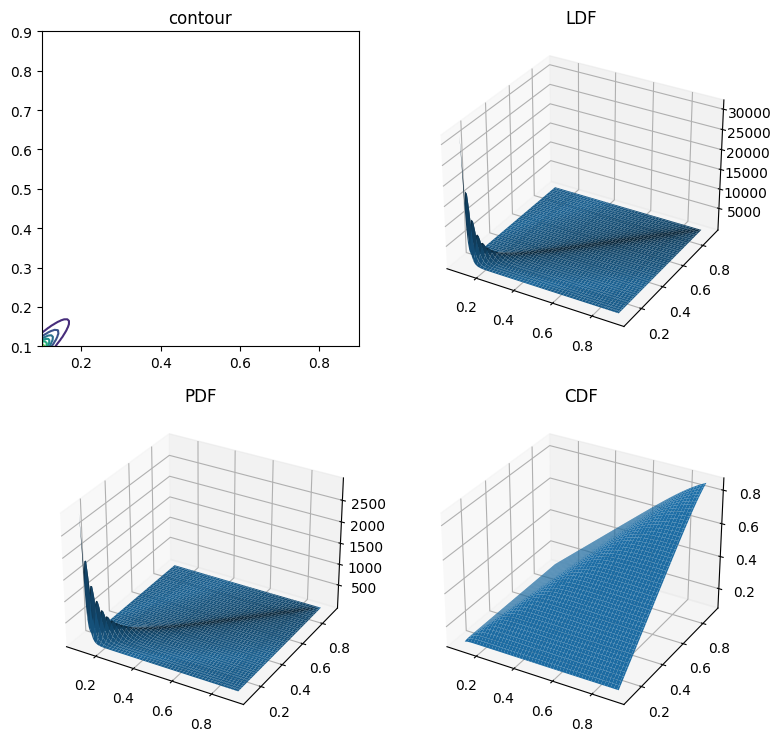

In [285]:
alpha = 10
def draw_truth():
    x = np.linspace(0.1, 0.9, 100)
    y = np.linspace(0.1, 0.9, 100) #発散しちゃう

    X, Y = np.meshgrid(x, y)
    def f(x,y):
        return clayton_density(x,y,alpha)/clayton_cdf(x,y,alpha)

    Z = f(X,Y)
    density = clayton_density(X,Y,alpha)
    cdf = clayton_cdf(X,Y,alpha)


    fig = plt.figure(figsize=(9, 9))

    # 等高線を作成する。
    ax1 = fig.add_subplot(221)
    ax1.set_title("contour")
    ax1.contour(x, y, Z)

    # 3D グラフを作成する。
    ax2 = fig.add_subplot(222, projection="3d")
    ax2.set_title("LDF")
    ax2.plot_surface(X, Y, Z)

    # 3D グラフを作成する。
    ax3 = fig.add_subplot(223, projection="3d")
    ax3.set_title("PDF")
    ax3.plot_surface(X, Y, density)

    # 3D グラフを作成する。
    ax4 = fig.add_subplot(224, projection="3d")
    ax4.set_title("CDF")
    ax4.plot_surface(X, Y, cdf)

    plt.show()

draw_truth()